<a href="https://colab.research.google.com/github/johanhoffman/DD2363-VT20/blob/master/template-report-lab-X.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab 5: Integration**
**Hilaire Bouaddi**

# **Abstract**

This lab consisted of implementing 3 functions to approximate integrals. The 2 first functions are deterministic while the monte-carlo function is based on stochastic methods. 

# **Set up environment**

In [69]:
import time
import numpy as np

from matplotlib import pyplot as plt
from matplotlib import tri
from matplotlib import axes
from mpl_toolkits.mplot3d import Axes3D

# **Introduction**

For the first function, we will implemement a 2-point Gauss quadrature over the unit interval. Thanks to the Problems assignment, we know that the points for such an prroximation are: 
$x_0 = \frac{\sqrt 3 + 1}{2\sqrt 3}$, $x_1 = \frac{\sqrt 3 - 1}{2\sqrt 3}$ and $w_0 = w_1 = 0.5$.

We can then compute $\int_0^1 p(x)dx = p(x_0)w_0 + p(x_1)w_1$ 

For the 2nd function, we know from the course that we should pick the midpoints of the three edges of the reference triangle. That means that: 
$v_0 = (0.5, 0)$, $v_1 = (0, 0.5)$, $v_2 = (0.5, 0.5)$ and $w_0 = w_1 = w_2 = 1/6$


Lastly for the 3rd function, we will use the Monte Carlo integration: 

$\int_D g(x)dx \approx \frac{|D|}{n} \sum_{i=1}^n{g(x_i)}$ (here $|D| = 1$)

# **Method**

Describe the methods you used to solve the problem. This may be a combination of text, mathematical formulas (Latex), algorithms (code), data and output.  

## Function: 2-point Gauss quadrature over a unit interval

Input: function f(x) 

Output: quadrature approximation of integral $\int_0^1 f(x) dx$

In [80]:
def gauss_2_points_quadrature_over_unit_interval(f):
    
    x_0 = (np.sqrt(3) + 1) / (2*np.sqrt(3))
    x_1 = (np.sqrt(3) - 1) / (2*np.sqrt(3))
    
    w_0 = 1/2
    w_1 = 1/2
    
    return f(x_0)*w_0 + f(x_1)*w_1 

## Function: 3-point edge midpoint quadrature over a reference triangle

Input: function f(x) 

Output: quadrature approximation of integral int_ref-triangle f(x) dx

In [81]:
def midpoint_quadrature_ref_triangle(f): 
    v_0 = np.array([0.5, 0])
    v_1 = np.array([0, 0.5])
    v_2 = np.array([1/2, 1/2])
    
    w_0 = 1/6
    w_1 = 1/6
    w_2 = 1/6
    
    return f(v_0)*w_0 + f(v_1)*w_1 + f(v_2)*w_2

## Monte Carlo quadrature over a unit interval

Input: a function f(x) 

Output: MC quadrature approximation of integral $\int_0^1 f(x) dx$

In [82]:
def MC_quadrature_approx_unit(f, n=1000):
    
    return np.mean([f(s) for s in np.random.rand(n)])


# **Results**

Present the results. If the result is an algorithm that you have described under the *Methods* section, you can present the data from verification and performance tests in this section. If the result is the output from a computational experiment this is where you present a selection of that data. 

## Testing 2-point Gauss quadrature over a unit interval

In [83]:
class polynomial:
    def __init__(self, a, b, c, d):
        self.a = a
        self.b = b
        self.c = c
        self.d = d
    
    def __call__(self, x):
        return self.a*x**3 + self.b*x**2 + self.c*x + self.d

In [84]:
p = polynomial(2, 5, 3, 1)

We have $p(x) = 2x^3 + 5x^2 + 3x + 1$, that means that we expect: 
$\int_0^1{p(x)dx} = [\frac 1 2 x^4 + \frac 5 3 x^3 + \frac 3 2 x^2 + x]_0^1 = \frac 1 2 + \frac 5 3 + \frac 3 2 + 1 = \frac{14} 3 \approx 4.66$

In [85]:
gauss_2_points_quadrature_over_unit_interval(p)

4.666666666666666

We can see that we were able to give the "exact" result. This corresponds to the theory since the polynomial has degree $\leq$ 3. 

## Testing 3-point edge midpoint quadrature over a reference triangle

We will take as example the quadratic integrand $p(v) = x^2 + 2y^2 +xy + 4x$ with $v = (x, y)$. 

We can compute the integral over a reference triangle by hand. First, let D be the the domain, the reference triangle. 
Then we have $D = \{(x, y) \in \mathbb{R^2}, x\in [0, 1], y \in [0, 1-x]\}$

We can then compute 


$
\begin{align*}
    \int_D p(v) dv &= \int_0^1 \int_0^{1-x} (x^2 + 2y^2 +xy + 4x)dy\;dx \\ 
    &= 23/24 \\
    &\approx 0.95833
\end{align*}
$

In [86]:
class quadratic_integrand:
    
    def __init__(self, x2, y2, xy, x, y, c):
        self.x2 = x2
        self.y2 = y2
        self.xy = xy
        self.x = x
        self.y = y
        self.c = c
        
    def __call__(self, v):
        return self.x2*v[0]**2 + self.y2*v[1]**2 + self.xy*v[0]*v[1] + self.x * v[0] + self.y * v[1] + self.c

qi = quadratic_integrand(1, 2, 1, 4, 0, 0)

In [87]:
midpoint_quadrature_ref_triangle(qi)

0.9583333333333333

This is what we expected. The result shows that we managed to exactly approximate the integral. 

## Testing Monte Carlo quadrature over a unit interval

Test: verify convergence rate 1/sqrt(n) with respect to number of quadrature points n. 

We will use the function $f(x) = x^2 + cos(x)$. We know that 

$
\begin{align*}
 \int_0^1 f(x) dx &= \int_0^1 (x^2 + cos(x)) dx \\ &= [1/3x^3 + sin(x)]_0^1 \\ &= \frac 1 3 +sin(1) \approx 1.17480
\end{align*}
$

In [90]:
class functionMC:
    def __call__(self, x):
        return np.cos(x) + x**2

f = functionMC()
results = []
ns = []
for sqrt_n in range(1, 100):
    n = sqrt_n ** 2
    ns.append(n)
    results.append(MC_quadrature_approx_unit(f, n))

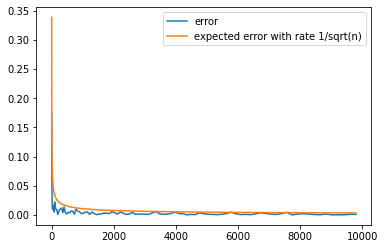

In [91]:
sigma_f = 1/(np.sqrt(12))
theoretical_value = (1/3 + np.sin(1))

plt.plot(ns, np.abs(results - theoretical_value), label='error')
plt.plot(ns, sigma_f/np.sqrt(ns) * theoretical_value, label='expected error with rate 1/sqrt(n)')
plt.legend()

Once again, we get exactly the results that we wanted: a decreasing error with rate $1/\sqrt n$

# **Discussion**

The most notable thing in this lab is to notice that we managed to exactly approximate the values of the integrals for the dirst function and the 2nd function in $O(1)$ (if you consider that the evaluation of a point is $O(1)$ by the function). Apart from that, the results are simply conform to what we would expect.